Plot function so we dont have to sync the other files

In [2]:
import matplotlib.pyplot as plt

def plot_visit_counts_heatmap(visits, column_labels=None):
    """
    Plots a heat map of Q-values across columns.

    Parameters:
      q_values (array-like): A 1D array of Q-values (one per column).
      column_labels (list, optional): Labels for each column. If None, numeric labels are used.
    """
    # Convert Q-values to a NumPy array and reshape into a 1xN matrix.
    visits = np.array(visits)
    data = visits.reshape(1, -1)
    # Set up column labels if not provided.
    if column_labels is None:
        column_labels = [str(i) for i in range(data.shape[1])]

    plt.figure(figsize=(8, 2))  # adjust figure size as needed
    # Display the data as an image, 'hot' colormap highlights high values.
    heatmap = plt.imshow(data, cmap="hot", aspect="auto")

    # Add a color bar
    plt.colorbar(heatmap, label="Count")

    # Remove the y-axis ticks since there is only one row.
    plt.yticks([])
    # Set x-axis ticks to be at each column center.
    plt.xticks(ticks=np.arange(data.shape[1]), labels=column_labels)

    plt.xlabel("Column")
    plt.title("Heat Map of Visit Counts Across Columns")
    plt.show()

### Plotting Q-values/MCTS

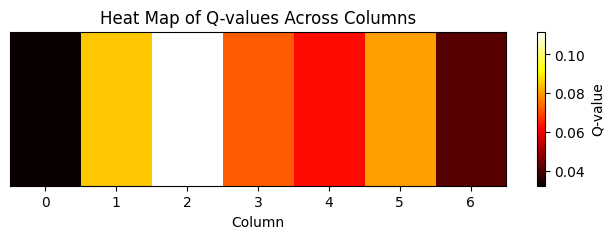

In [3]:
from agents import DQNAgent, MCTSDQNAgent
from utils import get_state_representation, plot_q_values_heatmap, get_connect_four_game, progress_to_state, visualize_board, plot_visit_counts_heatmap
import torch
import numpy as np

dqn = MCTSDQNAgent(            
       input_shape=(3,6,7),
            action_size=7,
            num_simulations=500,
            use_dqn_evaluator=True)
dqn.mcts_wrapper.dirichlet_noise = None
dqn.load('my_models/14-12_04_model_episode_4000.pth')
# dqn.load('saved/cleon_sim_200/model_episode_4000.pth')
# state = progress_to_state(get_connect_four_game(), [0,3,0,3,0])
# state = progress_to_state(get_connect_four_game(), [3,0,3,0,3])
# state.apply_action(3)
state = progress_to_state(get_connect_four_game(), [])
# visualize_board(state)

# TOGGLE THIS FOR DQN Q VALUES
state = get_state_representation(state, 0)
state_tensor = torch.FloatTensor(state).unsqueeze(0).to('cpu')
q_values = dqn.dqn_agent.policy_net(state_tensor).detach().numpy()

# TOGGLE THIS FOR MCTS VISIT COUNT
# _, q_values, counts, _ = dqn.mcts_wrapper.search(state)
# q_values = list(q_values.values())
# counts = list(counts.values())
# plot_visit_counts_heatmap(counts)

plot_q_values_heatmap(q_values)

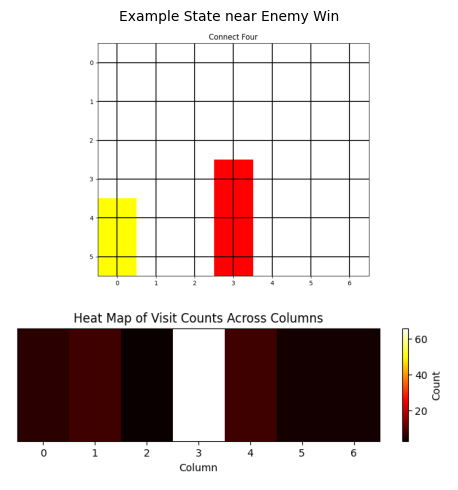

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read each image from file
heatmap_img = mpimg.imread("o1.png")
board_img = mpimg.imread("02.png")

# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(nrows=2, figsize=(10, 5), height_ratios=[3,2])

# Plot the second image (Connect Four board) on the right
axes[0].imshow(heatmap_img)
axes[0].set_title("Example State near Enemy Win", fontsize=10)
axes[0].axis("off")
# Plot the first image (heatmap) on the left
axes[1].imshow(board_img)
# axes[1].set_title("MCTS Visit Counts Across Columns", fontsize=10)
axes[1].axis("off")  # Hide axes for a cleaner look


plt.tight_layout()
# Save at high DPI for a publication-quality figure
plt.savefig("combined_figure.png", dpi=600, bbox_inches="tight")
plt.show()

In [5]:
from mcts_wrapper import MCTSWrapper
from utils import get_connect_four_game, progress_to_state

game = get_connect_four_game() 
state = progress_to_state(game, [4, 4, 3, 2, 3, 1, 4, 0, 3, 4, 1, 5, 6, 5, 1, 2])
mcts = MCTSWrapper(game, num_simulations=100)
ba, aqv, ac, ap = mcts.search(state)
print(ba)
print(aqv.items())
print(ac)
print(ap)

4
dict_items([(4, np.float64(1.0)), (6, np.float64(1.0)), (2, 1.0), (3, 0.0), (0, 0.0), (1, 0.0), (5, 0.0)])
{4: 1, 6: 1, 2: 1, 3: 0, 0: 0, 1: 0, 5: 0}
{4: np.float64(0.13465887699965354), 6: np.float64(0.15015062848231686), 2: np.float64(0.1259282019478772), 3: np.float64(0.11678800064273091), 0: np.float64(0.11915892720648667), 1: np.float64(0.22261857469193583), 5: np.float64(0.13069679002899892)}
